# AI Stock Photography Analysis - Demonstration Notebook

**This notebook is part of the project report:** *All Glow, No Substance:
Visual Construction of AI in Stock Photography*

**Full project materials available at:** https://github.com/caspicrow/CDA_Projectreport

This demonstration applies statistical analysis, natural language processing, and computer vision methods to 30 AI stock photos from Unsplash, showcasing the feasibility of large-scale computational analysis of stock photos. The notebook automatically loads data from the GitHub repository: simply run cells in sequence.

---

# Overall statistics

Statistical analysis lets us quantify engagement patterns across the dataset. By examining likes distribution, we can identify which images are "successful" and whether abstract representations outperform material ones. This provides some evidence of market preferences that might encourage particular (sublime) visual conventions over others.


## Engagement distribution

Here, I'll create a histogram of likes to identify top/bottom performers, using the cleaned dataset of 30 images collected from Unsplash using the search term "Artificial Intelligence".

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# ========================================
# SETUP: LOAD DATA FROM GITHUB
# ========================================
import pandas as pd
import os

# Clone repository
!git clone https://github.com/caspicrow/CDA_Projectreport

# Change to the repo directory
os.chdir('CDA_Projectreport')

# load the CSV
df = pd.read_csv('ai_images_with_tags.csv')

print(f"✓ Loaded {len(df)} images from GitHub")
print(f"✓ Images available in: images/")

# Verify images exist
print(f"✓ Found {len(os.listdir('images'))} image files")

#show dataframe structure
df.head()

Cloning into 'CDA_Projectreport'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 36 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 797.57 KiB | 8.96 MiB/s, done.
Resolving deltas: 100% (1/1), done.
✓ Loaded 30 images from GitHub
✓ Images available in: images/
✓ Found 30 image files


image_id                         description  \
0  eGGFZ5X2LnA  3D render of AI and GPU processors   
1  nGoCBxiaRO0                                 NaN   
2  gVQLAbGVB6Q                                 NaN   
3  X9Cemmq4YjM                        Hold My Hand   
4  _0iV9LmPDn0                Futuristic 3D Render   

                                     alt_description  likes color_hex  width  \
0     a computer chip with the letter a on top of it    314   #404040   3000   
1  an abstract image of a sphere with dots and lines    310   #262640   3840   
2  two hands touching each other in front of a pi...    141   #8c2659   7680   
3  two hands reaching for a flying object in the sky    709   #0cd9f3   2160   
4        a computer circuit board with a brain on it    269   #0c2659   5120   

   height           upload_date  \
0    2500  2023-10-17T21:17:04Z   
1    2160  2023-01-18T07:38:17Z   
2    4320  2023-09-16T22:28:37Z   
3    2700  2023-04-06T12:25:58Z   
4    2880  2023-02-26T20:15:34Z   

                                           image_url image_filename  \
0  https://images.unsplash.com/photo-169757741897...    image_1.jpg   
1  https://images.unsplash.com/photo-167402744448...    image_2.jpg   
2  https://images.unsplash.com/photo-169490311033...    image_3.jpg   
3  https://images.unsplash.com/photo-168078395474...    image_4.jpg   
4  https://images.unsplash.com/photo-167744213570...    image_5.jpg   

           local_path                                               tags  \
0  images/image_1.jpg  background, computer, artificial intelligence,...   
1  images/image_2.jpg  artificial intelligence, brain, future, networ...   
2  images/image_3.jpg  background, abstract, business, computer, blue...   
3  images/image_4.jpg  wallpaper, background, abstract, artificial in...   
4  images/image_5.jpg  4k wallpaper, technology, computer, future, 4k...   

   num_tags  
0        18  
1        11  
2        19  
3        14  
4         9

### Exploring the engagement data
Before visualising, we need to understand the data. This shows the spread: is engagement clustered or widely distributed? Mean vs median tells us if there are outliers pulling the average up.

In [ ]:
# ========================================
# EXPLORE LIKES DISTRIBUTION
# ========================================

print("\n" + "="*60)
print("ENGAGEMENT STATISTICS")
print("="*60)

# Basic statistics
print(f"\nLikes - Descriptive Statistics:")
print(f"  Minimum: {df['likes'].min()}")
print(f"  Maximum: {df['likes'].max()}")
print(f"  Mean: {df['likes'].mean():.1f}")
print(f"  Median: {df['likes'].median():.1f}")
print(f"  Standard Deviation: {df['likes'].std():.1f}")

# Show range
print(f"\nRange: {df['likes'].max() - df['likes'].min()} likes")


ENGAGEMENT STATISTICS

Likes - Descriptive Statistics:
  Minimum: 41
  Maximum: 4959
  Mean: 561.3
  Median: 201.0
  Standard Deviation: 961.3

Range: 4918 likes


Engagement varies dramatically across images (41–4,959 likes). The mean (561) is nearly 3x higher than the median (201), indicating a right-skewed distribution where a few popular images pull the average up.

Next, we'll create a histogram to visualise the shape of our data distribution.

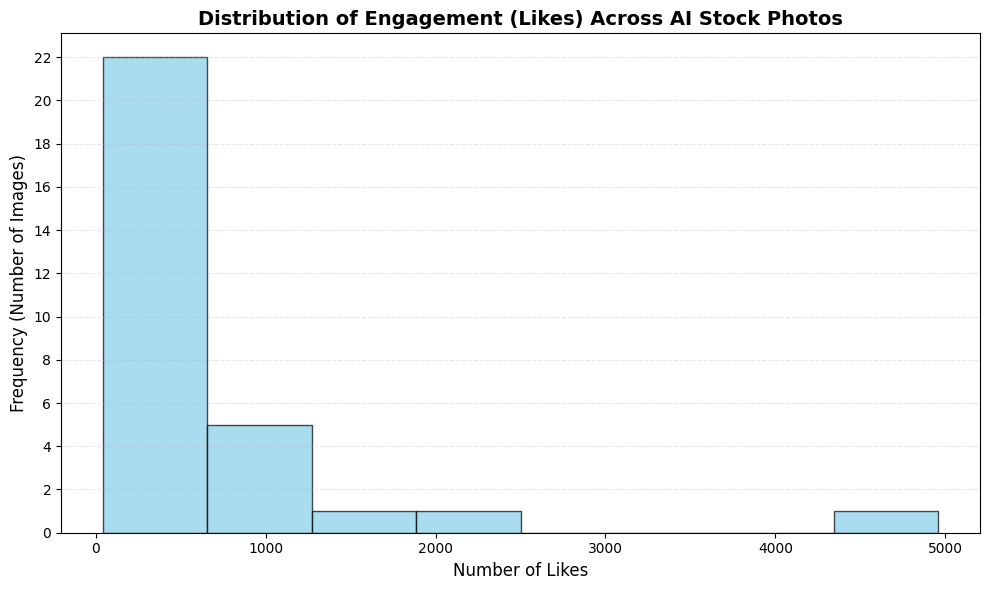

In [ ]:
# ========================================
# CREATE HISTOGRAM
# ========================================

plt.figure(figsize=(10, 6))

plt.hist(df['likes'], bins=8, edgecolor='black', color='skyblue', alpha=0.7)

plt.xlabel('Number of Likes', fontsize=12)
plt.ylabel('Frequency (Number of Images)', fontsize=12)
plt.title('Distribution of Engagement (Likes) Across AI Stock Photos', fontsize=14, fontweight='bold')
plt.yticks(range(0, 24, 2))
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

The histogram reveals stark clustering: most images get below 1000 likes, whilst outliers stretch to nearly 5,000 likes. There's a dramatic drop-off after the first bin, then what appears to be one isolated high performer. What's up with that? Below, I find and display this outlier.

TOP PERFORMING IMAGE
Filename: image_23.jpg
Image ID: Kj2SaNHG-hg
Likes: 4959
Description: white and black digital wallpaper
Colour: #0c2626
Tags: texture, black, pattern, light, night, white, abstract background, machine learning, lights, line, f...


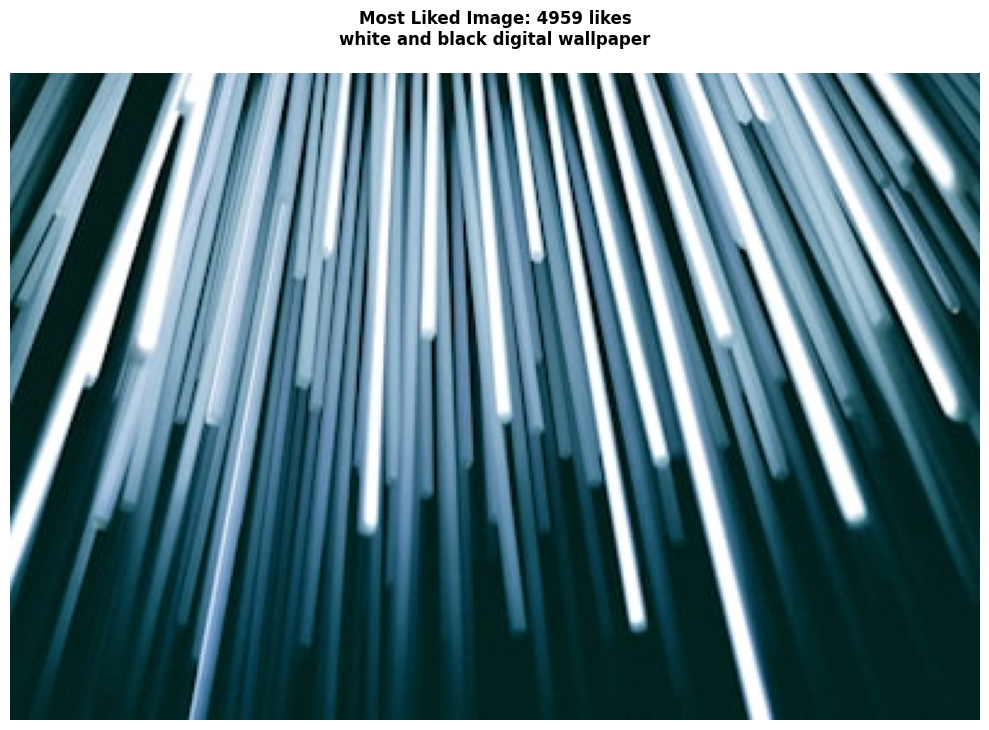

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Find the image with most likes
top_image = df.loc[df['likes'].idxmax()]

print("="*60)
print("TOP PERFORMING IMAGE")
print("="*60)
print(f"Filename: {top_image['image_filename']}")
print(f"Image ID: {top_image['image_id']}")
print(f"Likes: {top_image['likes']}")
print(f"Description: {top_image['alt_description']}")
print(f"Colour: {top_image['color_hex']}")
print(f"Tags: {top_image['tags'][:100]}...")  # First 100 chars of tags

# Display the image
img_path = f"images/{top_image['image_filename']}"

# Load and display
img = Image.open(img_path)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title(f"Most Liked Image: {top_image['likes']} likes\n{top_image['alt_description']}",
          fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


An abstract image with... speed lines? Light tubes? It's interesting that this background image is tagged with "machine learning" -- but its high like count could very well just be a result of many people downloading the image to use as their desktop background.

However, the fact that this background image appears in search results for "Artificial Intelligence" despite having no AI-specific visual elements (no robots, no brains, no networks, no code) is interesting! Its inclusion in these search results, and its high engagement, suggests that abstract, blue, motion-blur aesthetics have become so strongly associated with "tech" and "digital" concepts that they can stand in for AI without depicting anything concrete about the technology itself.


Just out of curiosity, let's also have a look at the bottom few performers. Which images have gotten the least engagement?

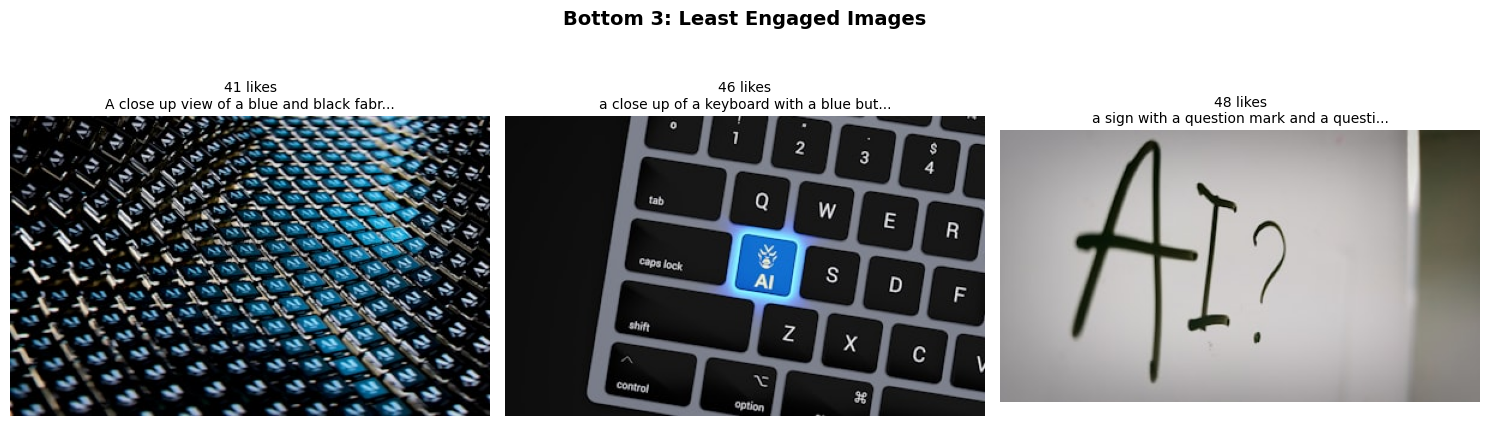

   image_filename  likes color_hex
10   image_11.jpg     41   #262626
26   image_27.jpg     46   #8c8c8c
29   image_30.jpg     48   #c0c0c0


In [ ]:
bottom_3 = df.nsmallest(3, 'likes')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (_, row) in enumerate(bottom_3.iterrows()):
    img = Image.open(f"images/{row['image_filename']}")

    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f"{row['likes']} likes\n{row['alt_description'][:40]}...",
                       fontsize=10)

plt.suptitle('Bottom 3: Least Engaged Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(bottom_3[['image_filename', 'likes', 'color_hex']])

Interesting! All three images contain the explicit word "AI", on fabric(?), a keyboard, and written on a whiteboard.

# Natural Language Processing

Now that we've examined engagement patterns, let's turn to textual analysis.
Tags are the keywords that make images searchable. By analyzing which tags appear most frequently across our AI stock photo dataset, we can investigate how AI is linguistically framed in commercial imagery. What concepts
are associated with "artificial intelligence" in commercial
stock photography?

We'll use two complementary visualisations:

**Word Cloud** - gives an immediate visual sense of dominant terms (size = frequency)

**Bar Chart** - provides precise counts for the top tags

Let's start by exploring what tags we're working with.


## Tag frequency + word cloud

In [ ]:
#imports
from collections import Counter
from wordcloud import WordCloud

# Look at a few examples
print("\nSample tags from first 5 images:")
for idx in range(5):
    print(f"\nImage {idx+1}: {df.iloc[idx]['image_filename']}")
    print(f"  Tags: {df.iloc[idx]['tags']}")

# Basic statistics
print(f"\n" + "="*60)
print("TAG STATISTICS")
print("="*60)
print(f"Total images: {len(df)}")
print(f"Images with tags: {df['tags'].notna().sum()}")
print(f"Average tags per image: {df['num_tags'].mean():.1f}")
print(f"Total tags: {df['num_tags'].sum()}")


Sample tags from first 5 images:

Image 1: image_1.jpg
  Tags: background, computer, artificial intelligence, communication, electronics, cloud computing, cpu, hardware, chip, board, circuit board, circuit, analog, 3d rendering, artificial, assembly, capacitor, grey

Image 2: image_2.jpg
  Tags: artificial intelligence, brain, future, network, google, blockchain, chatgpt, brainstorm, smart, openai, super computer

Image 3: image_3.jpg
  Tags: background, abstract, business, computer, blue, artificial intelligence, pattern, light, robot, automation, machine, analysis, bright, circuit, device, binary, automatic, automaton, brown

Image 4: image_4.jpg
  Tags: wallpaper, background, abstract, artificial intelligence, colorful, hands, 3d render, digital image, render, experimental, robotic, arms, robot arm, human arm

Image 5: image_5.jpg
  Tags: 4k wallpaper, technology, computer, future, 4k background, sci fi, intelligence, science fiction, interconnected

TAG STATISTICS
Total images: 30

Now we'll break apart the tag strings and count how often each unique tag appears:

In [ ]:
all_tags = []

# Loop through each row and split the tags
for tags_string in df['tags']:
    if pd.notna(tags_string) and tags_string != '':  # Skip empty/null
        # Split by comma and strip whitespace
        tags = [tag.strip() for tag in tags_string.split(',')]
        all_tags.extend(tags)

print(f"\nTotal tag instances collected: {len(all_tags)}")

# Count frequency of each unique tag
tag_counts = Counter(all_tags)

print(f"Unique tags: {len(tag_counts)}")
print(f"\nTop 20 most common tags:")
for tag, count in tag_counts.most_common(20):
    percentage = (count / len(df)) * 100
    print(f"  {tag:30s} - {count:2d} times ({percentage:.1f}% of images)")


Total tag instances collected: 400
Unique tags: 214

Top 20 most common tags:
  artificial intelligence        - 14 times (46.7% of images)
  technology                     - 14 times (46.7% of images)
  future                         - 10 times (33.3% of images)
  robot                          - 10 times (33.3% of images)
  computer                       -  9 times (30.0% of images)
  grey                           -  9 times (30.0% of images)
  tech                           -  9 times (30.0% of images)
  background                     -  7 times (23.3% of images)
  abstract                       -  7 times (23.3% of images)
  blue                           -  7 times (23.3% of images)
  circuit                        -  4 times (13.3% of images)
  artificial                     -  4 times (13.3% of images)
  pattern                        -  4 times (13.3% of images)
  light                          -  4 times (13.3% of images)
  intelligence                   -  4 times (13.3% of

Top tags cluster around abstraction: "technology" (46.7%), "future" (33.3%), "digital" (30%). Even "blue" (23.3%) and "light" (13.3%) have become semantic categories for AI.

"Robot" (33.3%) is striking: most AI systems aren't robots, yet the term is as common as "future." This suggests sci-fi imagery influences commercial representation more than technical accuracy.

Hardware terms appear ("circuit," "computer," "chip") but only at component level—no "data center," "server farm," or system-scale infrastructure. AI is tagged as individual parts, never as industrial-scale operations.

Across 214 unique tags: zero mentions of "labor," "energy," "environment," "extraction," or "surveillance."

Next, let's create a word cloud from these tags. Word clouds visualise frequency through size: bigger words appear more often.


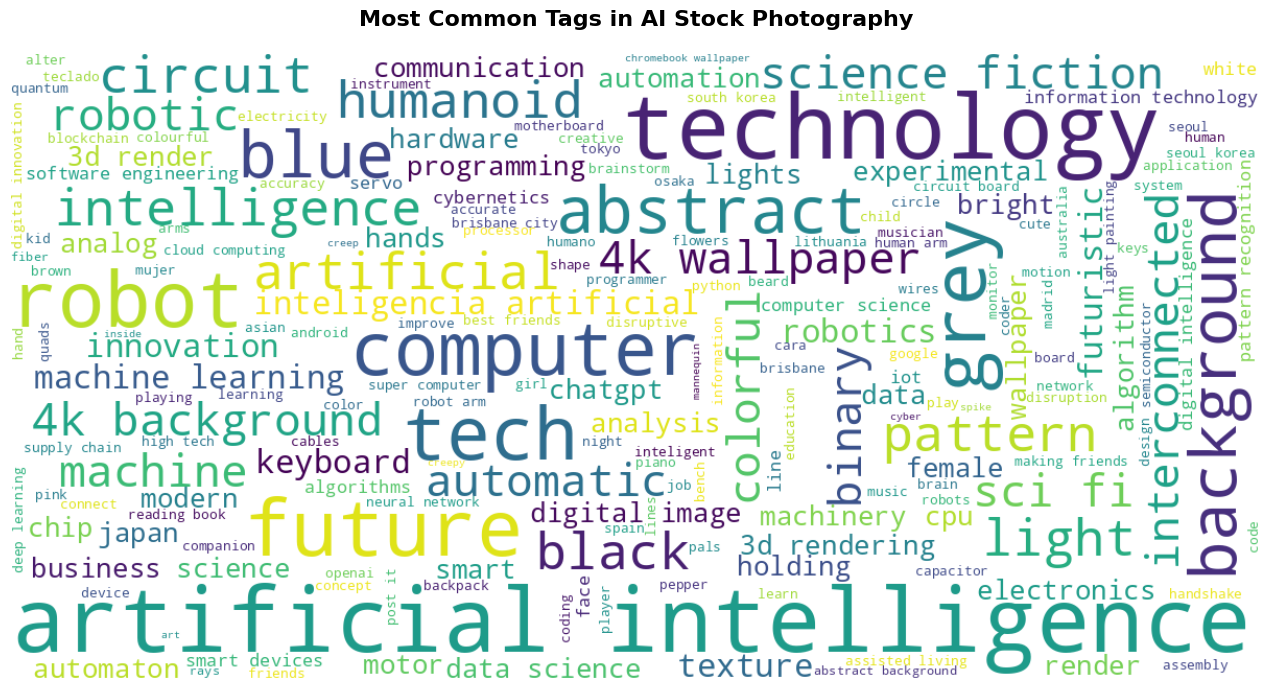

In [ ]:
# Generate word cloud from tag frequencies
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',  # Colour scheme
    relative_scaling=0.5,  # How much size varies by frequency
    min_font_size=10
).generate_from_frequencies(tag_counts)

# Display
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Tags in AI Stock Photography',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

# Save
plt.show()

Look at this beauty! "Technology" and "artificial intelligence" are doing the heavy lifting as expected, but **"blue" is basically as important as "robot"!** The colour has become indicative of the whole field of AI, apparently.

Other observations:
- "Science fiction" is... right there. We're literally framing actual technology as sci-fi, now.
- "Humanoid" is pretty big despite most AI being decidedly non-humanoid (server racks don't have robotic faces, right?)
- "Wallpaper" exists, which tracks: remember our top liked image?
- "ChatGPT" snuck in there, too, as the new hot thing.

What you WON'T see: anything about workers, energy use, or environmental impact. 214 unique tags across 30 images, and not one mentions the actual infrastructure keeping this stuff running.

## Presence/absence categories

While tag frequency tells us what is commonly said about AI imagery, it doesn't make visible what's systematically missing. Presence/absence analysis compares different categories of terms to reveal what's emphasised versus what's erased.

We'll create conceptual categories:

* Abstract/Futuristic terms: "future," "digital," "innovation," "concept"
* Material/Physical terms: "server," "hardware," "cable," "infrastructure"
* Labor/Human terms: "worker," "labor," "human," "employee"
* Critical/Environmental terms: "bias," "energy," "surveillance," "environment"

By counting how many images contain terms from each category, we can examine the potential erasure of AI's material realities. This allows us to more directly investiage whether AI stock photography dematerialises AI by foregrounding abstract language whilst obscuring physical infrastructure, labor, and environmental costs.

In [ ]:
# Define term categories (we'll search for these in the tags)

abstract_futuristic = [
    'future', 'digital', 'innovation', 'concept', 'abstract',
    'virtual', 'cyber', 'network', 'modern', 'advanced'
]

material_physical = [
    'server', 'hardware', 'cable', 'infrastructure', 'physical', 'data center'
    'material', 'chip', 'processor', 'circuit', 'factory'
]

labour_human = [
    'worker', 'labor', 'labour', 'employee', 'human', 'person',
    'people', 'staff', 'team', 'engineer'
]

critical_environmental = [
    'bias', 'surveillance', 'privacy', 'energy', 'environment',
    'pollution', 'extraction', 'mining', 'waste', 'carbon'
]

print("\nTerm categories defined:")
print(f"  Abstract/Futuristic: {len(abstract_futuristic)} terms")
print(f"  Material/Physical: {len(material_physical)} terms")
print(f"  Labor/Human: {len(labour_human)} terms")
print(f"  Critical/Environmental: {len(critical_environmental)} terms")


Term categories defined:
  Abstract/Futuristic: 10 terms
  Material/Physical: 10 terms
  Labor/Human: 10 terms
  Critical/Environmental: 10 terms


Let's check each image's tags to see if they contain any terms from each category:

In [ ]:
def contains_terms(tags_string, term_list):
    """
    Check if any terms from term_list appear in tags_string
    Returns True if at least one term is found
    """
    if pd.isna(tags_string) or tags_string == '':
        return False

    # Convert to lowercase for case-insensitive matching
    tags_lower = tags_string.lower()

    # Check if any term appears in the tags
    for term in term_list:
        if term in tags_lower:
            return True
    return False

# Count how many images contain terms from each category
abstract_count = df['tags'].apply(lambda x: contains_terms(x, abstract_futuristic)).sum()
material_count = df['tags'].apply(lambda x: contains_terms(x, material_physical)).sum()
labour_count = df['tags'].apply(lambda x: contains_terms(x, labour_human)).sum()
critical_count = df['tags'].apply(lambda x: contains_terms(x, critical_environmental)).sum()

# Calculate percentages
total_images = len(df)
abstract_pct = (abstract_count / total_images) * 100
material_pct = (material_count / total_images) * 100
labor_pct = (labor_count / total_images) * 100
critical_pct = (critical_count / total_images) * 100

print("\n" + "="*60)
print("RESULTS: HOW MANY IMAGES CONTAIN EACH CATEGORY?")
print("="*60)

print(f"\nAbstract/Futuristic terms:")
print(f"  {abstract_count}/{total_images} images ({abstract_pct:.1f}%)")

print(f"\nMaterial/Physical terms:")
print(f"  {material_count}/{total_images} images ({material_pct:.1f}%)")

print(f"\nLabour/Human terms:")
print(f"  {labor_count}/{total_images} images ({labor_pct:.1f}%)")

print(f"\nCritical/Environmental terms:")
print(f"  {critical_count}/{total_images} images ({critical_pct:.1f}%)")


RESULTS: HOW MANY IMAGES CONTAIN EACH CATEGORY?

Abstract/Futuristic terms:
  21/30 images (70.0%)

Material/Physical terms:
  7/30 images (23.3%)

Labour/Human terms:
  8/30 images (26.7%)

Critical/Environmental terms:
  0/30 images (0.0%)


Interesting! Let's visualise the results in a bar chart:

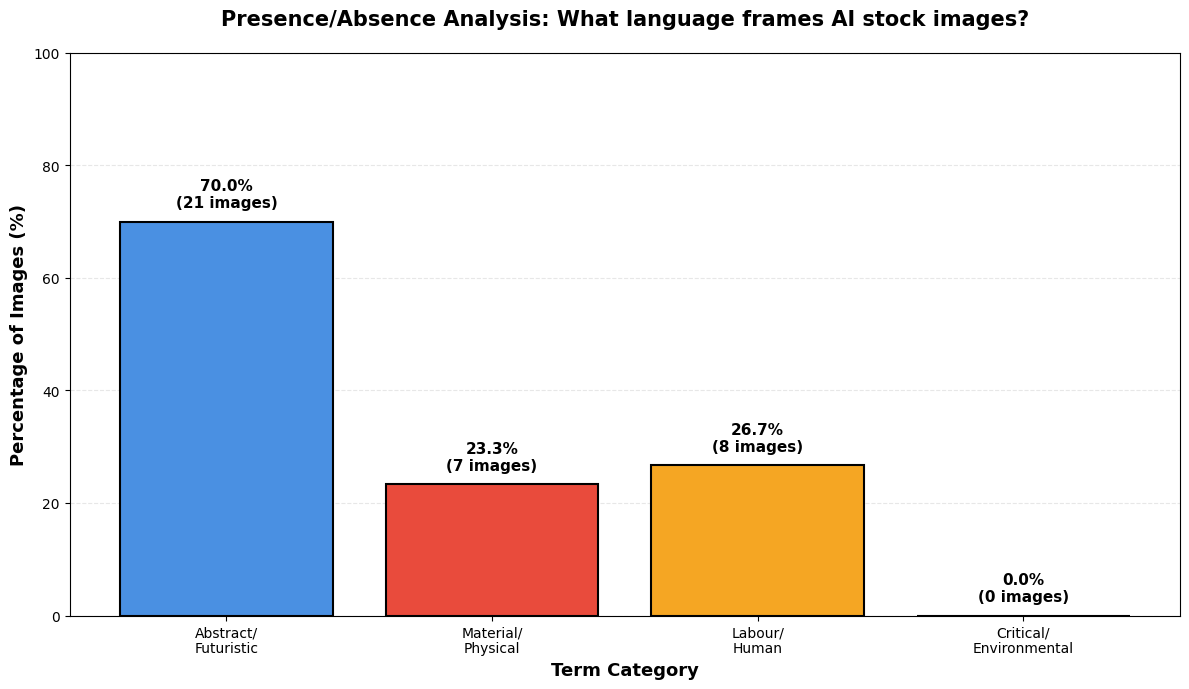

In [ ]:
# Prepare data for plotting
categories = ['Abstract/\nFuturistic', 'Material/\nPhysical', 'Labour/\nHuman', 'Critical/\nEnvironmental']
percentages = [abstract_pct, material_pct, labor_pct, critical_pct]
counts = [abstract_count, material_count, labor_count, critical_count]

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Use different colours to emphasize the contrast
colors = ['#4A90E2', '#E94B3C', '#F5A623', '#7ED321']
bars = ax.bar(categories, percentages, color=colors, edgecolor='black', linewidth=1.5)

# Labels and title
ax.set_ylabel('Percentage of Images (%)', fontsize=13, fontweight='bold')
ax.set_xlabel('Term Category', fontsize=13, fontweight='bold')
ax.set_title('Presence/Absence Analysis: What language frames AI stock images?',
             fontsize=15, fontweight='bold', pad=20)

# Set y-axis to go from 0-100%
ax.set_ylim(0, 100)

# Add percentage labels on top of bars
for bar, pct, count in zip(bars, percentages, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{pct:.1f}%\n({count} images)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

As expected, abstract and futuristic terms dominate the image tags, while none reflect the critical/environmental aspects of data and AI. Though we have to keep in mind that I created these categories with set terms, and that these might exclude some tags. Still, this quick overview is very interesting and says a lot about the way artists and photographers label their images for maximum reach.

Let's look at some of the images that contain ONLY abstract terms:

In [ ]:
# Find images with ONLY abstract terms
abstract_only = df[
    df['tags'].apply(lambda x: contains_terms(x, abstract_futuristic)) &
    ~df['tags'].apply(lambda x: contains_terms(x, material_physical)) &
    ~df['tags'].apply(lambda x: contains_terms(x, labour_human)) &
    ~df['tags'].apply(lambda x: contains_terms(x, critical_environmental))
]

print(f"\nImages with ONLY abstract/futuristic framing:")
print(f"  {len(abstract_only)} images ({len(abstract_only)/len(df)*100:.1f}%)")
if len(abstract_only) > 0:
    print("\nExamples:")
    for idx in range(min(3, len(abstract_only))):
        row = abstract_only.iloc[idx]
        print(f"  - {row['image_filename']}: {row['alt_description'][:60]}...")


Images with ONLY abstract/futuristic framing:
  10 images (33.3%)

Examples:
  - image_2.jpg: an abstract image of a sphere with dots and lines...
  - image_5.jpg: a computer circuit board with a brain on it...
  - image_18.jpg: photo of steel wool against black background...


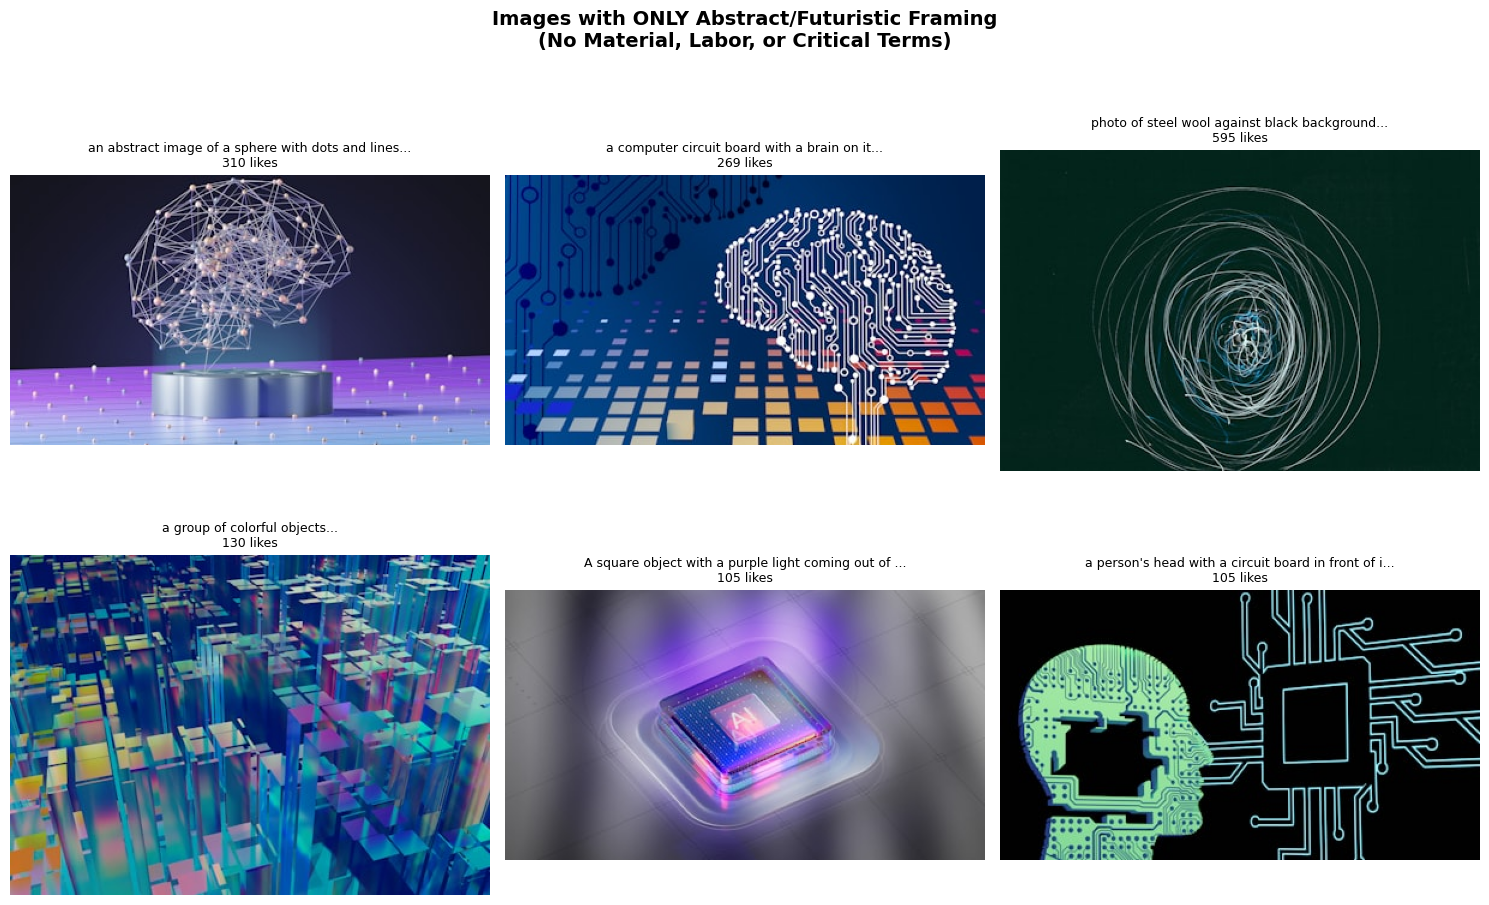

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Makes it easier to iterate

for idx in range(6):
  row = abstract_only.iloc[idx]

  # Load image
  img = Image.open(f"images/{row['image_filename']}")

  # Display
  axes[idx].imshow(img)
  axes[idx].axis('off')

  # Title with description and likes
  title = f"{row['alt_description'][:50]}...\n{row['likes']} likes"
  axes[idx].set_title(title, fontsize=9)

# Hide any unused subplots
for idx in range(6):
  axes[idx].axis('off')

plt.suptitle('Images with ONLY Abstract/Futuristic Framing\n(No Material, Labor, or Critical Terms)',
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

This sample of images with exclusively abstract/futuristic tags (no material/labor/critical terms) contains an interesting visual rhetoric: blue-teal palettes, glowing effects, geometric abstraction. They also show the abstraction of "concrete" elements like brains, circuits, chips, which appear as stylized (techni-fied?) aesthetic objects rather than functional components.

The picture of steel wool against a dark background is a bit of an odd one out here! The abstract tags make sense for it, but how come it ended up in the Artificial Intelligence search results?

# Computer vision

## Colour palette extraction

Colour palette extraction means identifying the dominant colours that make up an image. While you can see that an image "looks blue," computational analysis lets us:

* Quantify exactly which shades of blue appear most
* Compare colour patterns across 30 images
* Reveal trends invisible to casual observation (e.g., "82% of images have blue as a dominant colour")

Unsplash already calculated a dominant colour for each image and stored it in the `color_hex` column! This is a single hex code representing each image's overall colour tone. We can use this directly, but we'll also use K-means to go more in-depth.

What we'll do:

* Explore the existing colour hex codes
* extract full 5-colour palettes with K-means for more detail

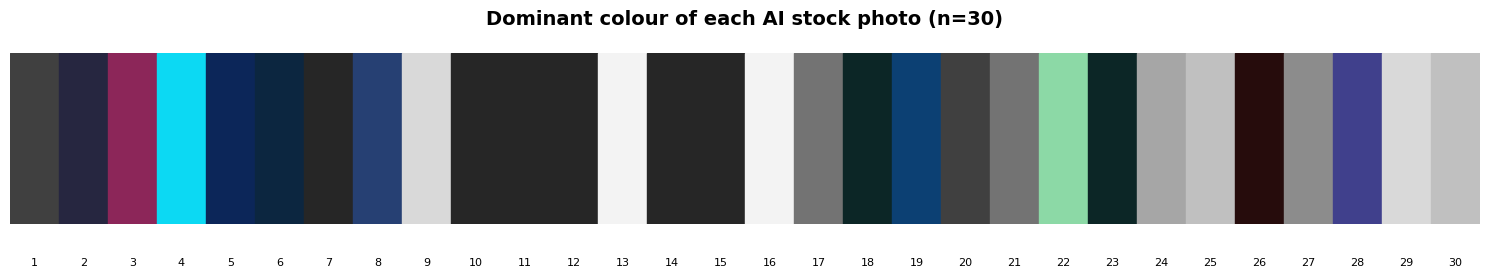

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))

ax.set_xlim(0, len(df))
ax.set_ylim(0, 1)

for idx, row in df.iterrows():
    hex_color = row['color_hex']

    # Draw rectangle
    ax.add_patch(plt.Rectangle((idx, 0), 1, 1, color=hex_color))

    # Add image number below
    ax.text(idx + 0.5, -0.2, str(idx+1),
            ha='center', va='top', fontsize=8)

ax.axis('off')
ax.set_title('Dominant colour of each AI stock photo (n=30)',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


Loads of dark colours, greys, and blues, with some odd green and purple-ish swatches standing out. Warm colours aren't very present, as expected. It's neat that unsplash gives us these dominant colours, but let's turn to K-means to explore *all* colours in each image and see if we can learn more from those palettes. To demonstrate, we'll extract the 5 most dominant colours from one image using K-means clustering.

In [ ]:
#install and import (once)
!pip install opencv-python -q

import cv2
from sklearn.cluster import KMeans

In [ ]:
def extract_color_palette(image_path, n_colors=5):
    """
    Extract n dominant colours from an image using K-means clustering

    Args:
        image_path: Path to image file
        n_colors: Number of colours to extract (default 5)

    Returns:
        numpy array of shape (n_colors, 3) with RGB values
    """

    # Step 1: Load the image
    img = cv2.imread(image_path)

    # Step 2: Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Step 3: Reshape from 2D grid to 1D list of pixels
    # Original shape: (height, width, 3)
    # New shape: (height × width, 3)
    pixels = img.reshape(-1, 3)

    # Step 4: Sample pixels for efficiency
    # Using all pixels is slow; 10,000 is sufficient
    sample_size = min(10000, len(pixels))
    np.random.seed(42)  # For reproducibility
    pixels_sample = pixels[np.random.choice(len(pixels), sample_size, replace=False)]

    # Step 5: Apply K-means clustering
    kmeans = KMeans(
        n_clusters=n_colors,  # We want 5 colours
        random_state=42,      # For reproducibility
        n_init=10             # Run algorithm 10 times, pick best result
    )
    kmeans.fit(pixels_sample)

    # Step 6: Extract the cluster centres (our dominant colours)
    colors = kmeans.cluster_centers_.astype(int)

    return colors


# Test on first image
test_path = f"images/{df.iloc[0]['image_filename']}"
test_colors = extract_color_palette(test_path)

print("\n" + "="*60)
print("TEST: First Image")
print("="*60)
print(f"Image: {df.iloc[0]['image_filename']}")
print(f"Unsplash dominant colour: {df.iloc[0]['color_hex']}")
print(f"\nExtracted 5-colour palette (RGB):")
for i, color in enumerate(test_colors):
    rgb = tuple(color)
    hex_code = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
    print(f"  Colour {i+1}: RGB{rgb} → {hex_code}")


TEST: First Image
Image: image_1.jpg
Unsplash dominant colour: #404040

Extracted 5-colour palette (RGB):
  Colour 1: RGB(np.int64(24), np.int64(23), np.int64(23)) → #181717
  Colour 2: RGB(np.int64(161), np.int64(165), np.int64(167)) → #a1a5a7
  Colour 3: RGB(np.int64(213), np.int64(216), np.int64(218)) → #d5d8da
  Colour 4: RGB(np.int64(67), np.int64(68), np.int64(69)) → #434445
  Colour 5: RGB(np.int64(112), np.int64(114), np.int64(115)) → #707273


As we can see, the K-means approach gave us a range of different hues compared to Unsplash's single dominant colour. Let's visualise three image palettes to get a feel for it:


SAMPLE: First 3 Images with Palettes

1. image_1.jpg
   Description: a computer chip with the letter a on top of it...


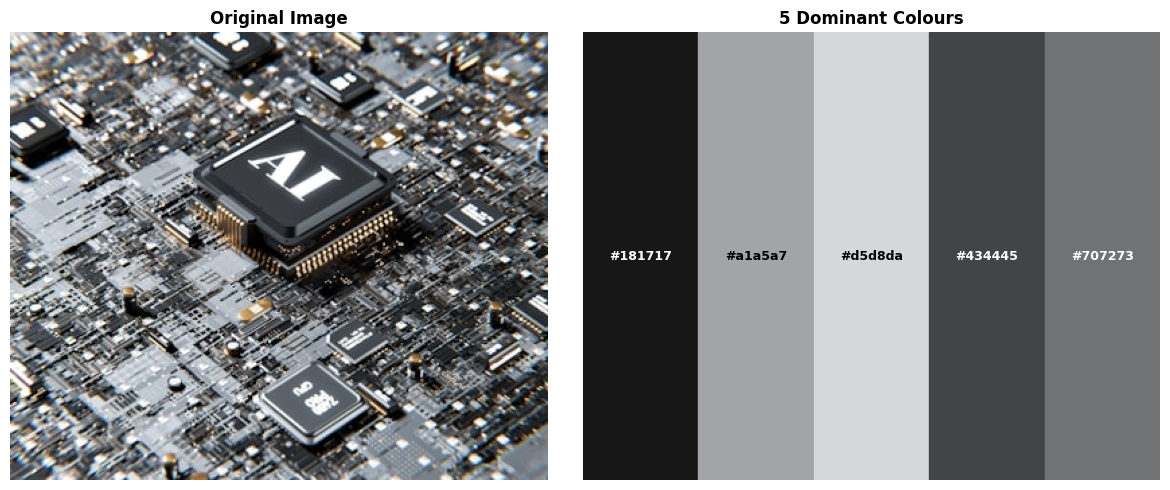


2. image_2.jpg
   Description: an abstract image of a sphere with dots and lines...


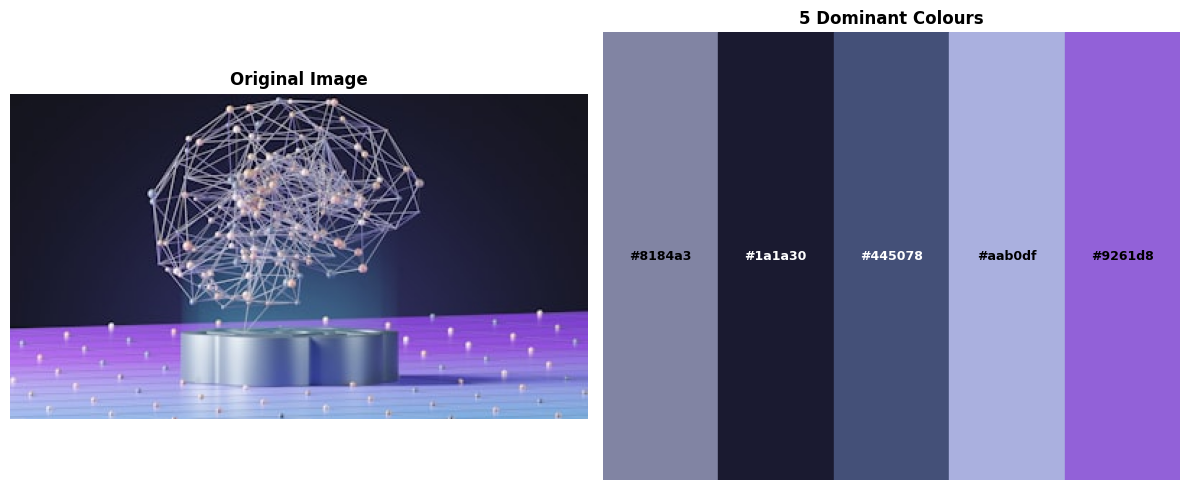


3. image_3.jpg
   Description: two hands touching each other in front of a pink background...


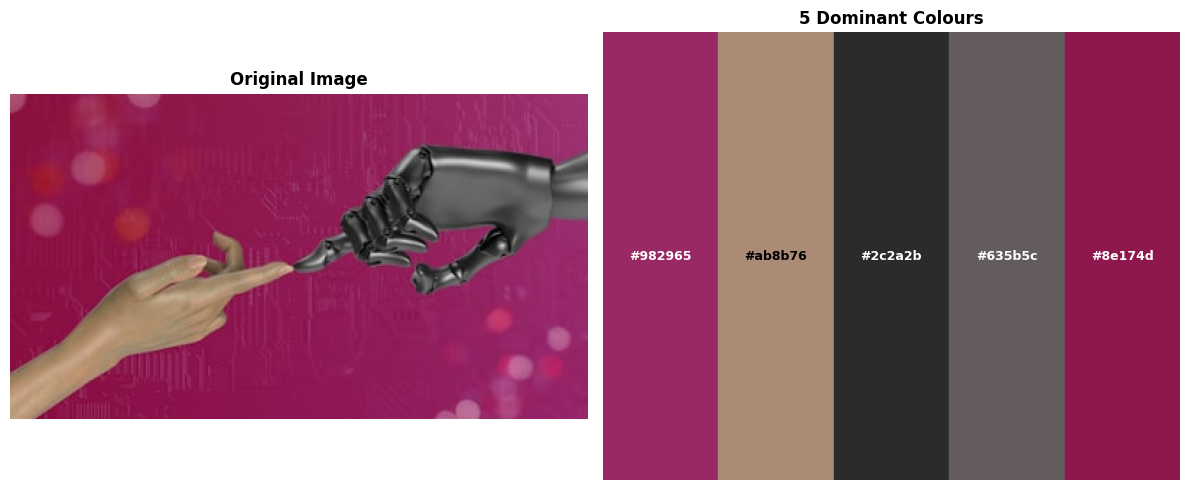

In [ ]:
def display_image_with_palette(image_path, colors):
    """
    Show an image next to its extracted colour palette
    """
    # Load image for display
    img = Image.open(image_path)

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Left panel: Original image
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=12, fontweight='bold')

    # Right panel: Colour palette
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 1)

    for i, color in enumerate(colors):
        # Draw coloured rectangle
        ax2.add_patch(plt.Rectangle((i, 0), 1, 1, color=color/255))

        # Add hex code label
        hex_code = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
        text_color = 'white' if sum(color) < 380 else 'black'
        ax2.text(i + 0.5, 0.5, hex_code,
                ha='center', va='center',
                fontsize=9, fontweight='bold',
                color=text_color)

    ax2.axis('off')
    ax2.set_title('5 Dominant Colours', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()


# Show first 3 images with palettes
print("\n" + "="*60)
print("SAMPLE: First 3 Images with Palettes")
print("="*60)

for i in range(3):
    row = df.iloc[i]
    image_path = f"images/{row['image_filename']}"

    print(f"\n{i+1}. {row['image_filename']}")
    print(f"   Description: {row['alt_description'][:60]}...")

    colors = extract_color_palette(image_path)
    display_image_with_palette(image_path, colors)

That looks pretty accurate and gives us more information than a single colour! The next piece of code will do this for all 30 images, giving us 150 colours representing the complete "colour vocabulary" of AI stock photography.

In [ ]:
print("\n" + "="*60)
print("EXTRACTING PALETTES FROM ALL 30 IMAGES")
print("="*60)

# Store all colours from all images
all_colors = []

for idx, row in df.iterrows():
    image_path = f"images/{row['image_filename']}"

    # Extract 5-colour palette
    palette = extract_color_palette(image_path, n_colors=5)

    # Add all 5 colours to our collection
    all_colors.extend(palette)

    print(f"[{idx+1}/30] {row['image_filename']}")

# Convert to numpy array
all_colors = np.array(all_colors)


EXTRACTING PALETTES FROM ALL 30 IMAGES
[1/30] image_1.jpg
[2/30] image_2.jpg
[3/30] image_3.jpg
[4/30] image_4.jpg
[5/30] image_5.jpg
[6/30] image_6.jpg
[7/30] image_7.jpg
[8/30] image_8.jpg
[9/30] image_9.jpg
[10/30] image_10.jpg
[11/30] image_11.jpg
[12/30] image_12.jpg
[13/30] image_13.jpg
[14/30] image_14.jpg
[15/30] image_15.jpg
[16/30] image_16.jpg
[17/30] image_17.jpg
[18/30] image_18.jpg
[19/30] image_19.jpg
[20/30] image_20.jpg
[21/30] image_21.jpg
[22/30] image_22.jpg
[23/30] image_23.jpg
[24/30] image_24.jpg
[25/30] image_25.jpg
[26/30] image_26.jpg
[27/30] image_27.jpg
[28/30] image_28.jpg
[29/30] image_29.jpg
[30/30] image_30.jpg


Let's use these 150 colours to find the overall dominant colours across this dataset. We'll do this by clustering these colours into 10 super-groups:

In [ ]:
# ========================================
# FIND TOP 10 COLOURS ACROSS ALL IMAGES
# ========================================

print("\n" + "="*60)
print("FINDING OVERALL COLOUR PALETTE")
print("="*60)

# Apply K-means again to cluster the 150 colours into 10 groups
kmeans_overall = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_overall.fit(all_colors)

# These 10 colours represent the entire dataset
top_10_colors = kmeans_overall.cluster_centers_.astype(int)

print("\nTop 10 Dominant Colours:")

for i, color in enumerate(top_10_colors):
    hex_code = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
    rgb = tuple(color)
    print(f"  {i+1}. {hex_code} RGB{rgb}")


FINDING OVERALL COLOUR PALETTE

Top 10 Dominant Colours:
  1. #235384 RGB(np.int64(35), np.int64(83), np.int64(132))
  2. #acb8be RGB(np.int64(172), np.int64(184), np.int64(190))
  3. #262f3a RGB(np.int64(38), np.int64(47), np.int64(58))
  4. #7e8190 RGB(np.int64(126), np.int64(129), np.int64(144))
  5. #dfdedf RGB(np.int64(223), np.int64(222), np.int64(223))
  6. #01dbfd RGB(np.int64(1), np.int64(219), np.int64(253))
  7. #10100f RGB(np.int64(16), np.int64(16), np.int64(15))
  8. #c58858 RGB(np.int64(197), np.int64(136), np.int64(88))
  9. #971732 RGB(np.int64(151), np.int64(23), np.int64(50))
  10. #565453 RGB(np.int64(86), np.int64(84), np.int64(83))


Lastly, we'll visualise these 10 colours!

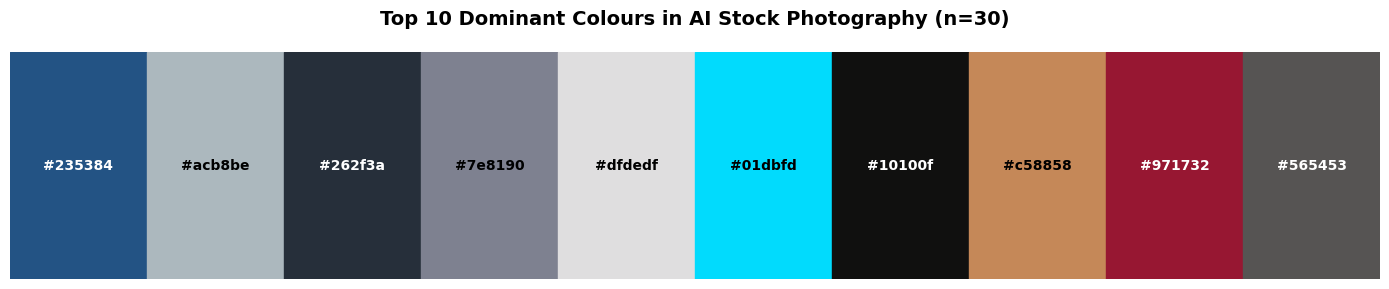

In [ ]:

fig, ax = plt.subplots(figsize=(14, 3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 1)

for i, color in enumerate(top_10_colors):
    # Draw colour swatch
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color/255))

    # Add hex code label
    hex_code = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
    text_color = 'white' if sum(color) < 380 else 'black'
    ax.text(i + 0.5, 0.5, hex_code,
            ha='center', va='center',
            fontsize=10, fontweight='bold',
            color=text_color)

ax.axis('off')
ax.set_title('Top 10 Dominant Colours in AI Stock Photography (n=30)',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()



8 out of 10 dominant colours are cool/neutral tones: blues, greys, and blacks. This "tech aesthetic" palette -- associated with digital interfaces, corporate professionalism, and futuristic imagery -- dominates whilst colours associated with physical materiality (earthy greens, browns, warm oranges) are nearly absent.

The two warm (ish?) tones  (#c58858 and #971732) are a muted beige and a strangely intense red. Out of curiosity, let's take a look at the images that contain them: do they break the pattern of techno-utopian imagery?


In [ ]:
# The two warm-ish colours from our top 10
warm_color_1 = np.array([197, 136, 88])   # #c58858 (tan/beige)
warm_color_2 = np.array([151, 23, 50])     # #971732 (burgundy)

print("="*60)
print("FINDING IMAGES WITH WARM TONES")
print("="*60)

# Function to check if a colour is close to target --> Gemini helped me out with this one
def color_distance(color1, color2):
    """Calculate Euclidean distance between two RGB colours"""
    return np.sqrt(np.sum((color1 - color2) ** 2))

def contains_warm_color(image_path, target_colors, threshold=50):
    """
    Check if image palette contains colours close to target colours
    threshold: how close colours need to be (lower = stricter)
    """
    palette = extract_color_palette(image_path, n_colors=5)

    for palette_color in palette:
        for target_color in target_colors:
            distance = color_distance(palette_color, target_color)
            if distance < threshold:
                return True, palette_color, target_color
    return False, None, None


# Check all images
warm_images = []

for idx, row in df.iterrows():
    image_path = f"images/{row['image_filename']}"

    contains, found_color, target = contains_warm_color(
        image_path,
        [warm_color_1, warm_color_2],
        threshold=60  # Adjust if needed
    )

    if contains:
        warm_images.append({
            'row': row,
            'image_path': image_path,
            'found_color': found_color,
            'target': target
        })
        print(f"✓ Found: {row['image_filename']}")

print(f"\n{len(warm_images)} images contain warm tones")

FINDING IMAGES WITH WARM TONES
✓ Found: image_3.jpg
✓ Found: image_5.jpg
✓ Found: image_6.jpg
✓ Found: image_7.jpg
✓ Found: image_13.jpg
✓ Found: image_26.jpg

6 images contain warm tones


Let's check these images out!

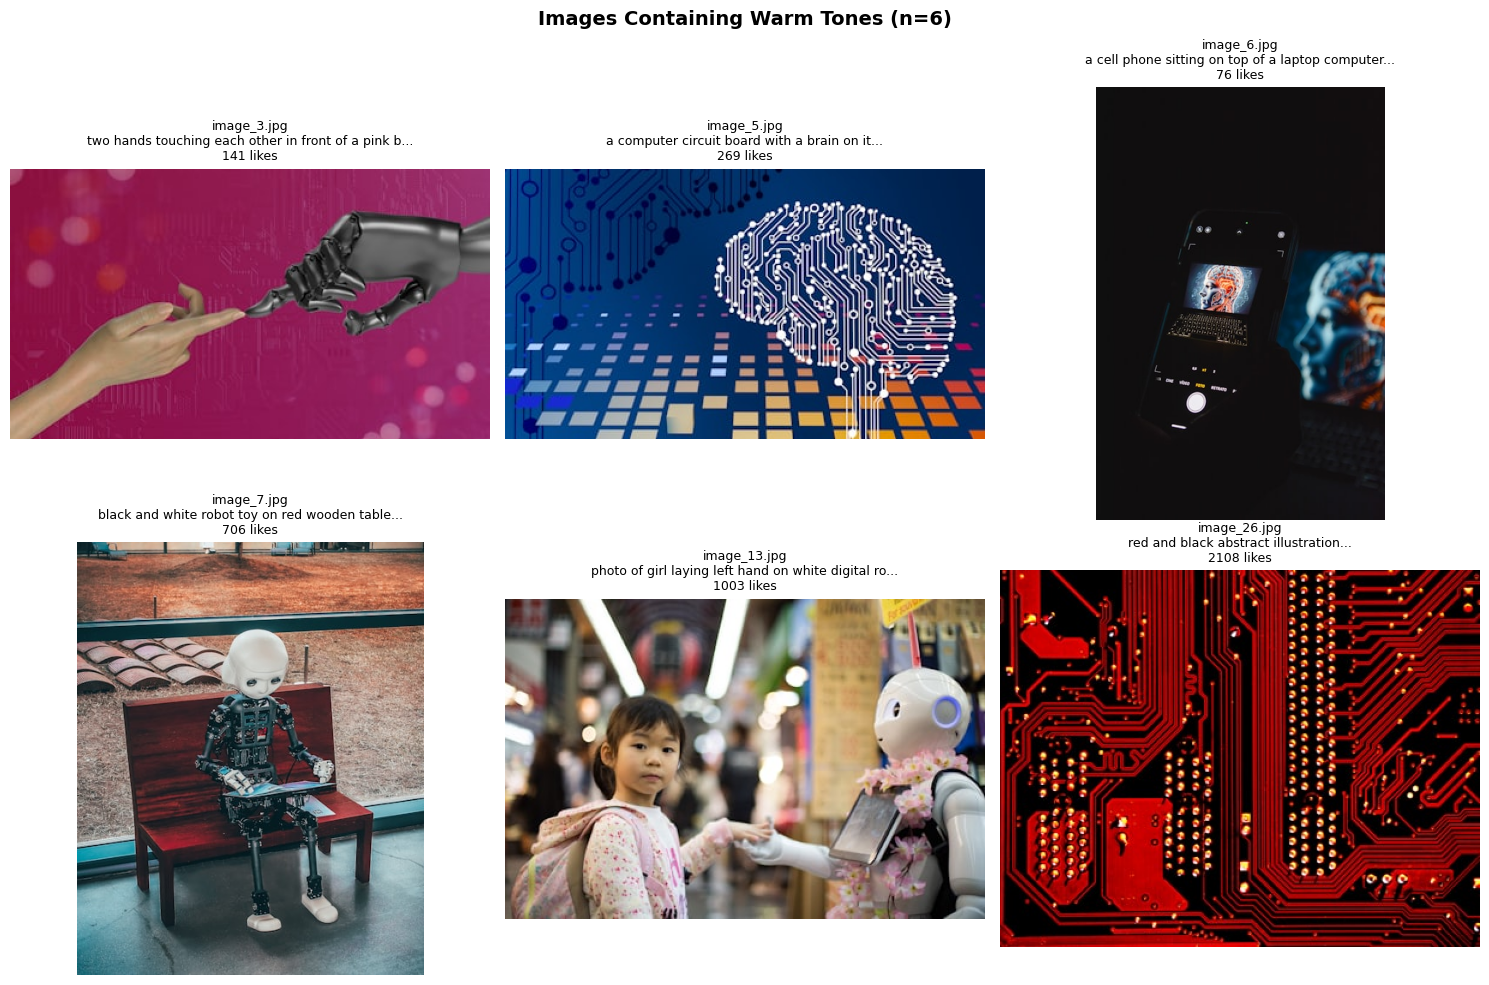

In [ ]:
# ========================================
# DISPLAY IMAGES WITH WARM TONES
# ========================================

if len(warm_images) > 0:
    # Calculate grid size
    num_images = len(warm_images)
    cols = min(3, num_images)
    rows = (num_images + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))

    if num_images == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows > 1 else axes

    for idx, img_data in enumerate(warm_images):
        row = img_data['row']
        img = Image.open(img_data['image_path'])

        axes[idx].imshow(img)
        axes[idx].axis('off')

        title = f"{row['image_filename']}\n{row['alt_description'][:50]}...\n{row['likes']} likes"
        axes[idx].set_title(title, fontsize=9)

    # Hide unused subplots
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')

    plt.suptitle(f'Images Containing Warm Tones (n={num_images})',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()



Interesting!

Six images contain warm tones (burgundy/pink/orange/tan) in their colour palettes, but they still conform to techno-utopian visual conventions: the circuit-board-brain (#5) uses orange purely as accent colour on blue; the red circuit board (#26) and robot hand against a pink background (#3) maintain the tech aesthetic through stylised, glowing treatments.

The child with robot (#13, girl) *does* shows actual human interaction with AI technology -- it is framed positively, and again focuses on a robot when that's certainly not all that AI is about.

The presence of warm colours doesn't fundamentally disrupt the pattern. These images largely maintain abstraction, stylisation, and optimistic framing. The colour palette varies, but the visual rhetoric (AI as aesthetic object rather than material) remains pretty consistent.